In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

import sklearn
from sklearn.datasets import load_diabetes



import urllib.request
from requests import get
from csv import DictReader
from bs4 import BeautifulSoup as Soup
from datetime import date
from io import StringIO 

In [2]:
# Load CSV from a local file
df = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/sample_submission_pzljTaX.csv')
df

,record_ID,units_sold
0,212645,0
1,212646,0
2,212647,0
3,212648,0
4,212649,0
...,...,...
13855,232281,0
13856,232282,0
13857,232285,0
13858,232286,0


In [4]:
df[["record_ID", "units_sold"]].nunique()

record_ID     13860
units_sold        1
dtype: int64

In [28]:
# Load CSV from a local file
df1 = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/test_nfaJ3J5.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [31]:
# Load CSV from a local file
df_train = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone2_Demand_Forecast/train_0irEZ2H.csv')

In [44]:
# Create a dataframe
df_train = pd.DataFrame(df_train)
df_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [45]:
#Code task 3#
#Call the head method on ski_data to print the first several rows of the data
print(df_train.head(2))

   record_ID      week  store_id  sku_id  total_price  base_price  \
0          1  17/01/11      8091  216418      99.0375    111.8625   
1          2  17/01/11      8091  216419      99.0375     99.0375   

   is_featured_sku  is_display_sku  units_sold  
0                0               0          20  
1                0               0          28  


In [32]:
#Code task 4#
#Use df's`select_dtypes` method to select columns of dtype 'object'
df_train.select_dtypes(include = "number")

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,8091,216418,99.0375,111.8625,0,0,20
1,2,8091,216419,99.0375,99.0375,0,0,28
2,3,8091,216425,133.9500,133.9500,0,0,19
3,4,8091,216233,133.9500,133.9500,0,0,44
4,5,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38
150146,212639,9984,223153,235.8375,235.8375,0,0,30
150147,212642,9984,245338,357.6750,483.7875,1,1,31
150148,212643,9984,547934,141.7875,191.6625,0,1,12


In [46]:
#Code task - shape of the data

print(df_train.shape)

(150150, 9)


In [34]:
#Code task 5#
#Use pandas' Series method `value_counts` to find any duplicated records
df_train['record_ID'].value_counts().head()

record_ID
212644    1
1         1
2         1
3         1
4         1
Name: count, dtype: int64

In [35]:
#Code task 6#
#Use pandas' Series method `value_counts` to find any duplicated records
df_train['store_id'].value_counts().head()

store_id
8094    3120
8991    2990
9823    2990
8023    2730
8438    2730
Name: count, dtype: int64

In [36]:
#Code task 7#
#Use pandas' Series method `value_counts` to find any duplicated records
df_train['sku_id'].value_counts().head()

sku_id
219009    9750
216233    9620
219029    9490
223245    9490
222087    9360
Name: count, dtype: int64

In [37]:
#Code task 8#
#Select the 'Region' and 'state' columns from data and use the `nunique` method to calculate
#the number of unique values in each
df_train[["record_ID", "store_id", "sku_id"]].nunique()

record_ID    150150
store_id         76
sku_id           28
dtype: int64

In [38]:
#Code task 9#
#Call the info method on df to see a summary of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [47]:
#Code task 10#
#Call data's `describe` method for a statistical summary of the numerical columns
#Hint: there are fewer summary stat columns than features, so displaying the transpose
#will be useful again
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
record_ID,150150.0,106271.555504,61386.037861,1.000,53111.2500,106226.5000,159452.7500,212644.0000
store_id,150150.0,9199.422511,615.591445,8023.000,8562.0000,9371.0000,9731.0000,9984.0000
sku_id,150150.0,254761.132468,85547.306447,216233.000,217217.0000,222087.0000,245338.0000,679023.0000
total_price,150149.0,206.626751,103.308516,41.325,130.3875,198.0750,233.7000,562.1625
base_price,150150.0,219.425927,110.961712,61.275,133.2375,205.9125,234.4125,562.1625
is_featured_sku,150150.0,0.095611,0.294058,0.000,0.0000,0.0000,0.0000,1.0000
is_display_sku,150150.0,0.133200,0.339792,0.000,0.0000,0.0000,0.0000,1.0000
units_sold,150150.0,51.674206,60.207904,1.000,20.0000,35.0000,62.0000,2876.0000


In [48]:
# Code task 11
df_train.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

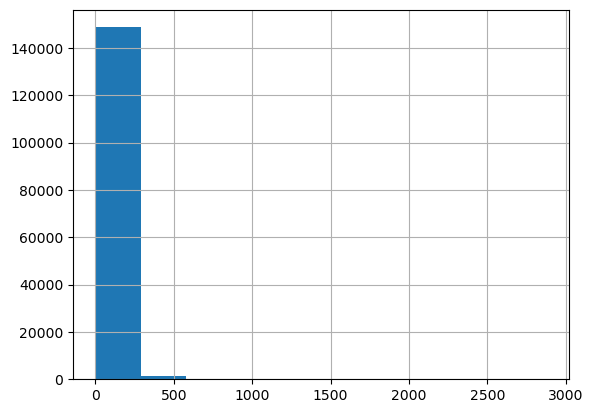

In [51]:
(df_train.units_sold.hist())

<Axes: >

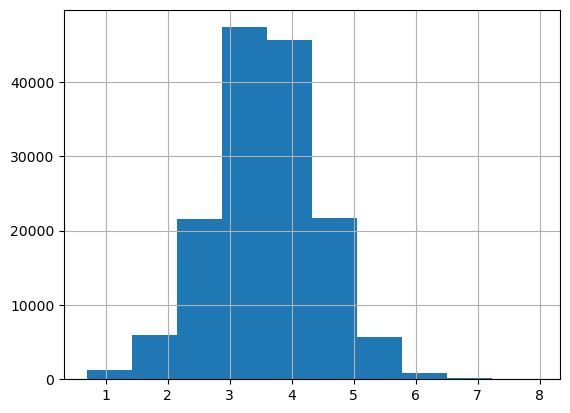

In [59]:
# Code task 12 normalize the data
np.log1p(df_train['units_sold']).hist()

<Axes: >

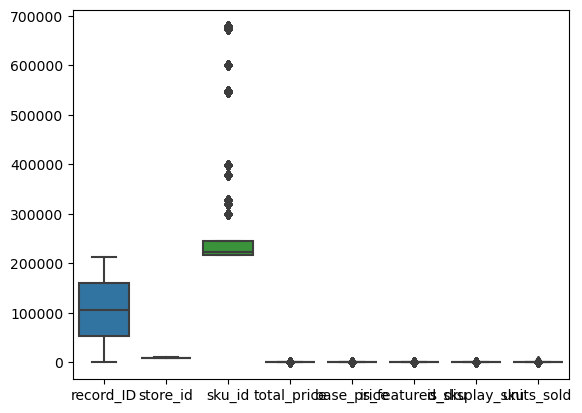

In [55]:
# Code task 13# Box Plot
import seaborn as sns
sns.boxplot(df_train)

<Axes: >

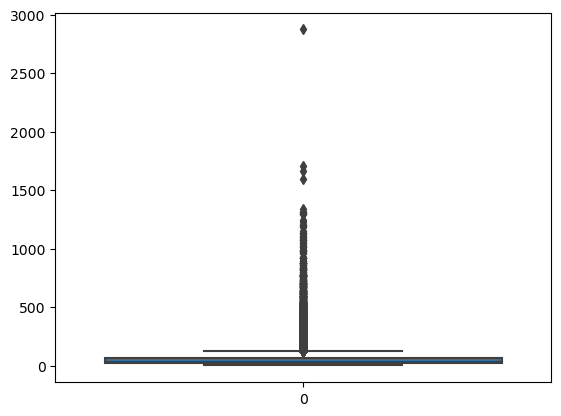

In [61]:
# Code task 14 Box Plot
import seaborn as sns
sns.boxplot(df_train['units_sold'])

<Axes: >

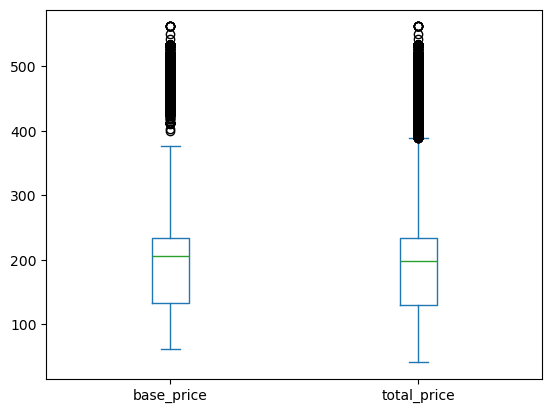

In [53]:
# Code task 15 Box Plot
df_train[['base_price', 'total_price']].plot.box()